In [11]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [12]:
# these set the pandas defaults so that it will print ALL values, even for very long lists and large dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#read in the data, skipping the first 73 rows of ancillary information
data=pd.read_csv('planets030619.csv', skiprows=72)
print(data.shape)

(3924, 68)


# Lab 8 

Today's lab will be an exploration of how to establish and measure correlations with python. I will provide some guidance and constraints, but the exercise is fairly open ended. Clare and I are available to answer any questions and to help guide you. Your final product should be a brief (2-3pg) .pdf report describing your results. You will also hand in this notebook. It should contain well-commented code and markdown cells above code cells that describe briefly what you're doing (e.g. "computing a covariance matrix for log variables as a comparison").

***The basic constraints are: ***
1) You should explore the correlation between planet mass and radius   
2) You should compare pearson, spearman, and kendall correlation coefficients    
3) You should make data-driven decisions about the appropriateness of each correlation coefficient by exploring the distribution of the variables graphically using both histograms and scatterplots and should connect these ideas to ideas about when parametric vs. non-parametric statistics are appropriate    
4) You should explore linear-linear, log-log, and log-linear correlations and distributions and should make a data-driven decision regarding which to use  
5) Where appropriate, you should divide the data into multiple populations  
6) At each step, you should compute and compare covariance (np.cov) and correlation (np.corrcoef) matrices and attempt to understand how they relate to one another and to the correlation coefficients  

***Your report should answer the following questions in a data-driven (i.e. report statistics, show plots to justify your arguments) way:***  
1) How strongly are planet mass and radius related? Is there more than one relationship evident in the data?  
2) How did you decide which correlation coefficient was the most appropriate? Was the answer different when considering the relationships between the quantities in linear-linear, log-linear and log-log space?  

***Tips:***  
1) np.log() takes the **natural logarithm** of a quantity. To take the base 10 log, use np.log10().  
2) you will need to begin by removing nans from the dataset. I recommend writing a filter function that uses the np.isnan() function. You may wish to define other filter functions as well during the course of your exploration.    
3) if you choose to divide the data into two or more populations, I recommend defining new dataframes to hold each one 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c8ac630>]],
      dtype=object)

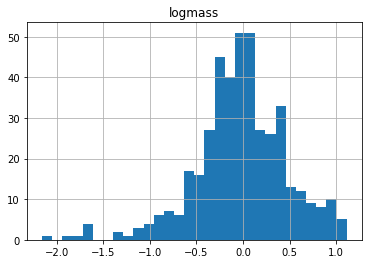

In [126]:
data_bigr.hist(column="logmass", bins=30)

In [150]:
pearsonrsm, pearsonpsm = st.pearsonr(data_smallr["logmass"],data_smallr["pl_radj"])
spearmanrsm, spearmanpsm = st.spearmanr(data_smallr["logmass"],data_smallr["pl_radj"])
kendallrsm, kendallpsm = st.kendalltau(data_smallr["logmass"],data_smallr["pl_radj"])

In [151]:
print(pearsonrsm, spearmanrsm, kendallrsm)
print(pearsonpsm, spearmanpsm, kendallpsm)

0.3600000002162118 0.4740372721362793 0.33661342169725456
2.941681193289533e-08 5.976565116117404e-14 6.463206163340642e-14


In [129]:
pearsonrbg, pearsonpbg = st.pearsonr(data_bigr["logmass"],data_bigr["pl_radj"])
spearmanrbg, spearmanpbg = st.spearmanr(data_bigr["logmass"],data_bigr["pl_radj"])
kendallrbg, kendallpbg = st.kendalltau(data_bigr["logmass"],data_bigr["pl_radj"])

In [130]:
print(pearsonrbg, spearmanrbg, kendallrbg)
print(pearsonpbg, spearmanpbg, kendallpbg)

0.39932314569667415 0.3113638183503653 0.2115019352313925
9.726328069427435e-18 4.9758599338289454e-11 6.973366981536001e-11


array([[0.75903686, 0.3461998 ],
       [0.3461998 , 0.29413748]])

Things to notice:

1) Pearson r changes drastically in log space. Spearman and Kendall don't change at all. 

array([[4.3047667 , 0.11176362],
       [0.11176362, 0.09744796]])